In [47]:
import pandas as pd
import random
import numpy as np
import decimal
from decimal import *
import math
import matplotlib.pyplot as plt
import time

In [48]:
DF = pd.read_csv("ratings_Electronics.csv")

In [49]:
whole_set = range(len(DF))
not_in_smp = random.sample(whole_set,len(DF)-1000)
#not_in_smp = list((set(whole_set))-(set(smp)))

In [50]:
DF_sampled = DF.drop(index = not_in_smp)
DF_processed = DF_sampled.drop(columns = ['Time_Stamp'])
DF_processed.head()

,User_ID,Product_ID,Rating
13,AMO214LNFCEI4,528881469,1
494,A38DTJURWNUQTZ,972683275,5
900,A6D7R8LLIC3FO,972683275,5
1759,A2U4EGQ83SQUSI,1400501776,5
3099,ART0YA13VWXNB,1400599997,3


In [51]:
Users = DF_processed['User_ID'].drop_duplicates().values.tolist()
Products = DF_processed['Product_ID'].drop_duplicates().values.tolist()

In [52]:
user_rating_table = np.full((len(Users), len(Products)), -1, dtype=int)
for i in DF_processed.index.values:
    user_rating_table[Users.index(DF_processed['User_ID'][i])][Products.index(DF_processed['Product_ID'][i])] = DF_processed['Rating'][i]
print(user_rating_table)

[[ 1 -1 -1 ... -1 -1 -1]
 [-1  5 -1 ... -1 -1 -1]
 [-1  5 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ...  4 -1 -1]
 [-1 -1 -1 ... -1  2 -1]
 [-1 -1 -1 ... -1 -1  5]]


In [53]:
def RMSEandMAE(R,R_hat):
    RMSE = 0
    MAE = 0
    counter = 0
    for i in range(len(R)):
        for j in range(len(R[0])):
            if(R[i][j]>=0):
                counter+=1
                RMSE=RMSE+(R[i][j]-R_hat[i][j])**2
                MAE = MAE+abs(R[i][j]-R_hat[i][j])
    RMSE=RMSE/counter
    MAE=MAE/counter
    RMSE=RMSE**0.5
    return RMSE,MAE

In [54]:
def basicMF(K,epsilon,iteration):
    start=time.perf_counter()
    P = np.random.rand(len(Users), K)#.astype(type('float', (float,), {}))
    Q = np.random.rand(K,len(Products))#.astype(type('float', (float,), {}))
    RMSE_Seq = []
    MAE_Seq = []
    Prev_U = np.dot(P,Q)
    for I in range (iteration):
        for i in range(len(user_rating_table)):
            for j in range(len(user_rating_table[i])):
                eij=user_rating_table[i][j]-np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    if user_rating_table[i][j]>0:
                        P[i][k]=P[i][k]+epsilon*(2*eij*Q[k][j])
                        Q[k][j]=Q[k][j]+epsilon*(2*eij*P[i][k])
        U = np.dot(P,Q)
        F_value = np.linalg.norm(U-Prev_U)
        Prev_U = U
        RMSE,MAE = RMSEandMAE(user_rating_table,U)
        RMSE_Seq.append(RMSE)
        MAE_Seq.append(MAE)
        print("-------------")
        print("iteration_time")
        print(I)
        print("RMSE")
        print(RMSE)
        print("MAE")
        print(MAE)
        if(F_value<=1):
            break
    end=time.perf_counter()
    training_time = end - start
    return P,Q,RMSE_Seq,MAE_Seq,training_time

In [55]:
def MF_with_normalization(K,epsilon,iteration,lamda):
    start=time.perf_counter()
    P = np.random.rand(len(Users), K)#.astype(type('float', (float,), {}))
    Q = np.random.rand(K,len(Products))#.astype(type('float', (float,), {}))
    RMSE_Seq = []
    MAE_Seq = []
    Prev_U = np.dot(P,Q)
    for I in range (iteration):
        for i in range(len(user_rating_table)):
            for j in range(len(user_rating_table[i])):
                eij=user_rating_table[i][j]-np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    if user_rating_table[i][j]>0:
                        P[i][k]=P[i][k]+epsilon*(2*eij*Q[k][j]-lamda*P[i][k])
                        Q[k][j]=Q[k][j]+epsilon*(2*eij*P[i][k]-lamda*Q[k][j])
        U = np.dot(P,Q)
        F_value = np.linalg.norm(U-Prev_U)
        Prev_U = U
        RMSE,MAE = RMSEandMAE(user_rating_table,U)
        RMSE_Seq.append(RMSE)
        MAE_Seq.append(MAE)
        print("-------------")
        print("iteration_time")
        print(I)
        print("RMSE")
        print(RMSE)
        print("MAE")
        print(MAE)
        if(F_value<=1):
            break
    end=time.perf_counter()
    training_time = end - start
    return P,Q,RMSE_Seq,MAE_Seq,training_time

In [56]:
def MF_with_randomization(K,epsilon,iteration,lamda):
    start=time.perf_counter()
    P = np.random.rand(len(Users), K)#.astype(type('float', (float,), {}))
    Q = np.random.rand(K,len(Products))#.astype(type('float', (float,), {}))
    RMSE_Seq = []
    MAE_Seq = []
    Prev_U = np.dot(P,Q)
    for I in range (iteration):
        i_rand = random.randint(0,len(user_rating_table)-1)
        j_rand = random.randint(0,len(user_rating_table[0])-1)
        for i in range(len(user_rating_table)):
            for k in range(K):
                if user_rating_table[i][j_rand]>0:
                    eij=user_rating_table[i][j_rand]-np.dot(P[i,:],Q[:,j_rand])
                    P[i][k]=P[i][k]+epsilon*(2*eij*Q[k][j_rand]-lamda*P[i][k])
        for j in range(len(user_rating_table[i])):
            for k in range(K):
                if user_rating_table[i_rand][j]>0:
                    eij=user_rating_table[i_rand][j]-np.dot(P[i_rand,:],Q[:,j])
                    Q[k][j]=Q[k][j]+epsilon*(2*eij*P[i_rand][k]-lamda*Q[k][j])
        U = np.dot(P,Q)
        F_value = np.linalg.norm(U-Prev_U)
        Prev_U = U
        RMSE,MAE = RMSEandMAE(user_rating_table,U)
        RMSE_Seq.append(RMSE)
        MAE_Seq.append(MAE)
        print("-------------")
        print("iteration_time")
        print(I)
        print("RMSE")
        print(RMSE)
        print("MAE")
        print(MAE)
        if(F_value<=1):
            break
    end=time.perf_counter()
    training_time = end - start
    return P,Q,RMSE_Seq,MAE_Seq,training_time

In [57]:
def semipositiveMF(K,epsilon,iteration,lamda):
    start=time.perf_counter()
    P = np.random.rand(len(Users), K)#.astype(type('float', (float,), {}))
    Q = np.random.rand(K,len(Products))#.astype(type('float', (float,), {}))
    RMSE_Seq = []
    MAE_Seq = []
    Prev_U = np.dot(P,Q)
    for I in range (iteration):
        for i in range(len(user_rating_table)):
            for j in range(len(user_rating_table[i])):
                eij=user_rating_table[i][j]-np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    if user_rating_table[i][j]>0:
                        P[i][k]=P[i][k]+epsilon*(2*eij*Q[k][j]-lamda*P[i][k])
                        Q[k][j]=Q[k][j]+epsilon*(2*eij*P[i][k]-lamda*Q[k][j])
                        if P[i][k]<0:
                            P[i][k]=0
                        if Q[k][j]<0:
                            Q[k][j]=0
        U = np.dot(P,Q)
        F_value = np.linalg.norm(U-Prev_U)
        Prev_U = U
        RMSE,MAE = RMSEandMAE(user_rating_table,U)
        RMSE_Seq.append(RMSE)
        MAE_Seq.append(MAE)
        print("-------------")
        print("iteration_time")
        print(I)
        print("RMSE")
        print(RMSE)
        print("MAE")
        print(MAE)
        if(F_value<=1):
            break
    end=time.perf_counter()
    training_time = end - start
    return P,Q,RMSE_Seq,MAE_Seq,training_time

In [58]:
def momentumMF(K,epsilon,iteration,lamda,sigma):
    start=time.perf_counter()
    P = np.random.rand(len(Users), K)#.astype(type('float', (float,), {}))
    Q = np.random.rand(K,len(Products))#.astype(type('float', (float,), {}))
    RMSE_Seq = []
    MAE_Seq = []
    Prev_U = np.dot(P,Q)
    prev_sigma_p = np.zeros((len(user_rating_table),K))  
    prev_sigma_q=np.zeros((K,len(user_rating_table[0])))
    for I in range (iteration):
        for i in range(len(user_rating_table)):
            for j in range(len(user_rating_table[i])):
                eij=user_rating_table[i][j]-np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    if user_rating_table[i][j]>0:
                        prev_sigma_p[i][k]=(1-sigma)*(2*eij*Q[k][j]-lamda*P[i][k])+sigma*prev_sigma_p[i][k]
                        prev_sigma_q[k][j]=(1-sigma)*(2*eij*P[i][k]-lamda*Q[k][j])+sigma*prev_sigma_q[k][j]
                        P[i][k]=P[i][k]+epsilon*prev_sigma_p[i][k]
                        Q[k][j]=Q[k][j]+epsilon*prev_sigma_q[k][j]
        U = np.dot(P,Q)
        F_value = np.linalg.norm(U-Prev_U)
        Prev_U = U
        RMSE,MAE = RMSEandMAE(user_rating_table,U)
        RMSE_Seq.append(RMSE)
        MAE_Seq.append(MAE)
        print("-------------")
        print("iteration_time")
        print(I)
        print("RMSE")
        print(RMSE)
        print("MAE")
        print(MAE)
        if(F_value<=1):
            break
    end=time.perf_counter()
    training_time = end - start
    return P,Q,RMSE_Seq,MAE_Seq,training_time

In [59]:
P_basic_2,Q_basic_2,RMSE_basic_2,MAE_basic_2,time_basic_2 = basicMF(2,0.01,1500)

-------------
iteration_time
0
RMSE
3.6532074221653734
MAE
3.376574995299009
-------------
iteration_time
1
RMSE
3.5242862409924656
MAE
3.2531393087600846
-------------
iteration_time
2
RMSE
3.382177406861402
MAE
3.115953443669594
-------------
iteration_time
3
RMSE
3.227676734602613
MAE
2.9653849996325587
-------------
iteration_time
4
RMSE
3.062516802834577
MAE
2.802693751140191
-------------
iteration_time
5
RMSE
2.8889339575362576
MAE
2.6301486640419673
-------------
iteration_time
6
RMSE
2.709378570916285
MAE
2.450798047162492
-------------
iteration_time
7
RMSE
2.526411565792589
MAE
2.26759920204874
-------------
iteration_time
8
RMSE
2.342646333412968
MAE
2.0838191373188635
-------------
iteration_time
9
RMSE
2.16064458304517
MAE
1.9019605702131157
-------------
iteration_time
10
RMSE
1.98277580455482
MAE
1.724709057536653
-------------
iteration_time
11
RMSE
1.8110894524923742
MAE
1.5548508982527474
-------------
iteration_time
12
RMSE
1.6472399762002654
MAE
1.3939283747127116


In [60]:
P_basic_10,Q_basic_10,RMSE_basic_10,MAE_basic_10,time_basic_10 = basicMF(10,0.01,1500)

-------------
iteration_time
0
RMSE
1.8662470599850978
MAE
1.685727299856089
-------------
iteration_time
1
RMSE
1.597264416955511
MAE
1.433170246579625
-------------
iteration_time
2
RMSE
1.3586239032927412
MAE
1.2098579321257519
-------------
iteration_time
3
RMSE
1.149389150338908
MAE
1.0155496462272782
-------------
iteration_time
4
RMSE
0.9680050710197473
MAE
0.8491111687987007
-------------
iteration_time
5
RMSE
0.8124211433730252
MAE
0.7080217266457819
-------------
iteration_time
6
RMSE
0.68025526199333
MAE
0.5888838684188801
-------------
iteration_time
7
RMSE
0.5689540515264558
MAE
0.4892401130522174
-------------
iteration_time
8
RMSE
0.4759306056725482
MAE
0.4061377413158709
-------------
iteration_time
9
RMSE
0.39867338944099734
MAE
0.33726469168450746
-------------
iteration_time
10
RMSE
0.33482622986398564
MAE
0.28039841211315386
-------------
iteration_time
11
RMSE
0.2822417158668649
MAE
0.233470762288528
-------------
iteration_time
12
RMSE
0.23901129569948912
MAE
0.19

In [61]:
P_basic_50,Q_basic_50,RMSE_basic_50,MAE_basic_50,time_basic_50 = basicMF(50,0.01,1500)

-------------
iteration_time
0
RMSE
3.366578264652509
MAE
3.2101977218280595
-------------
iteration_time
1
RMSE
1.658365718035278
MAE
1.5385107085833543
-------------
iteration_time
2
RMSE
0.8800763666868765
MAE
0.7958676513638631
-------------
iteration_time
3
RMSE
0.4867609888443633
MAE
0.4308388483482659
-------------
iteration_time
4
RMSE
0.27758793096415457
MAE
0.24033277390914823
-------------
iteration_time
5
RMSE
0.16267633825090513
MAE
0.13685079657937252
-------------
iteration_time
6
RMSE
0.0979439005015768
MAE
0.07932698780688746
-------------
iteration_time
7
RMSE
0.06063901926006557
MAE
0.04681425857084494
-------------
iteration_time
8
RMSE
0.03863591405829223
MAE
0.028111951454654106
-------------
iteration_time
9
RMSE
0.025327408446653113
MAE
0.01716624835474592
-------------
iteration_time
10
RMSE
0.017053663027299854
MAE
0.010658421499404347
-------------
iteration_time
11
RMSE
0.011759192222505878
MAE
0.006728017257531242
-------------
iteration_time
12
RMSE
0.0082

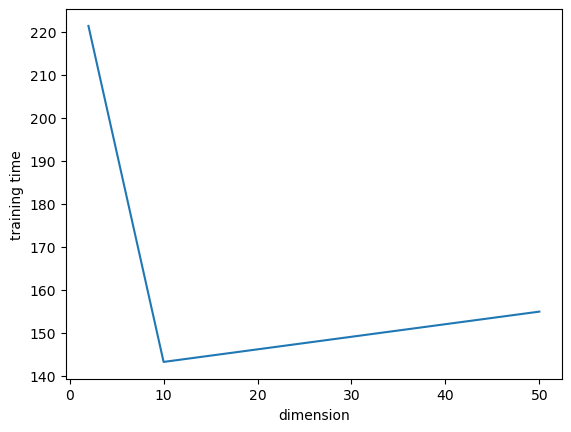

In [62]:
time_basic = [time_basic_2,time_basic_10,time_basic_50]
k_value = [2,10,50]
plt.plot(k_value,time_basic)
plt.xlabel("dimension")
plt.ylabel("training time")
#plt.legend(loc = "best")
plt.show()

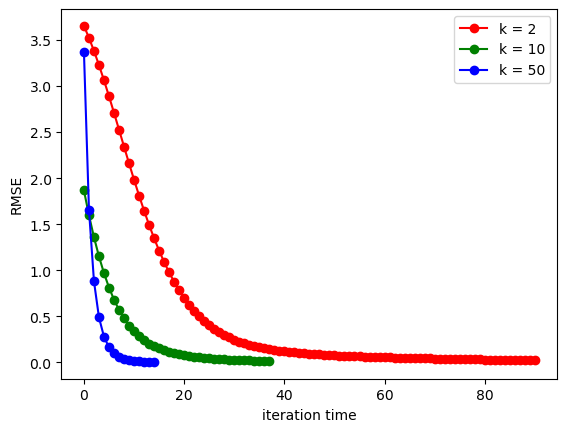

In [63]:
plt.plot(range(len(RMSE_basic_2)),RMSE_basic_2,'o-',color = 'r',label="k = 2")
plt.plot(range(len(RMSE_basic_10)),RMSE_basic_10,'o-',color = 'g',label="k = 10")
plt.plot(range(len(RMSE_basic_50)),RMSE_basic_50,'o-',color = 'b',label="k = 50")
plt.xlabel("iteration time")
plt.ylabel("RMSE")
plt.legend(loc = "best")
plt.show()

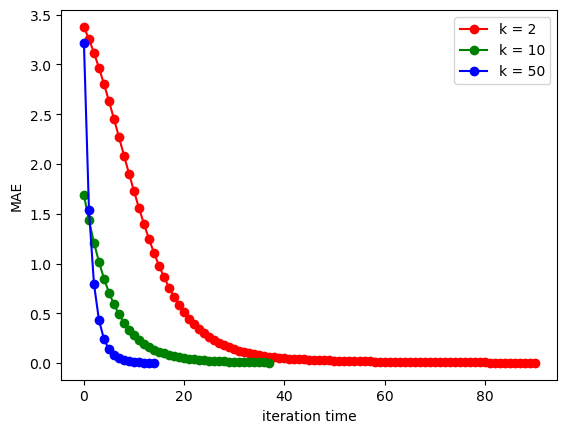

In [64]:
plt.plot(range(len(MAE_basic_2)),MAE_basic_2,'o-',color = 'r',label="k = 2")
plt.plot(range(len(MAE_basic_10)),MAE_basic_10,'o-',color = 'g',label="k = 10")
plt.plot(range(len(MAE_basic_50)),MAE_basic_50,'o-',color = 'b',label="k = 50")
plt.xlabel("iteration time")
plt.ylabel("MAE")
plt.legend(loc = "best")
plt.show()

In [65]:
P_normalization_10,Q_normalization_10,RMSE_normalization_10,MAE_normalization_10,time_normalization_10 = MF_with_normalization(10,0.01,1500, 0.00005)

-------------
iteration_time
0
RMSE
1.8882190818857938
MAE
1.699303664635279
-------------
iteration_time
1
RMSE
1.616308474081728
MAE
1.4443845747032709
-------------
iteration_time
2
RMSE
1.3743729892323708
MAE
1.2193324585386836
-------------
iteration_time
3
RMSE
1.1617718319357053
MAE
1.023221160921847
-------------
iteration_time
4
RMSE
0.9773181016687598
MAE
0.8542302126138941
-------------
iteration_time
5
RMSE
0.8191651878317786
MAE
0.7109847048634304
-------------
iteration_time
6
RMSE
0.6849576867123501
MAE
0.5907134849356874
-------------
iteration_time
7
RMSE
0.5720686515472078
MAE
0.4900182160438715
-------------
iteration_time
8
RMSE
0.4778123688398254
MAE
0.4061036786169526
-------------
iteration_time
9
RMSE
0.3995933249030577
MAE
0.33669814425037586
-------------
iteration_time
10
RMSE
0.33499618228325756
MAE
0.2795318957442661
-------------
iteration_time
11
RMSE
0.2818344291148947
MAE
0.23242821622013224
-------------
iteration_time
12
RMSE
0.23817237225167362
MAE
0

In [66]:
P_randomization_10,Q_randomization_10,RMSE_randomization_10,MAE_randomization_10,time_randomization_10 = MF_with_randomization(10,0.01,10000, 0.00005)

-------------
iteration_time
0
RMSE
2.1317330551578935
MAE
1.9199525988687267
-------------
iteration_time
1
RMSE
2.1313445366545043
MAE
1.9195616699950844
-------------
iteration_time
2
RMSE
2.131159730483491
MAE
1.919370364878787
-------------
iteration_time
3
RMSE
2.1307270040833775
MAE
1.919064161197583
-------------
iteration_time
4
RMSE
2.1304672752884954
MAE
1.9187770868301472
-------------
iteration_time
5
RMSE
2.1298316190832622
MAE
1.9183311953670112
-------------
iteration_time
6
RMSE
2.1291615153686867
MAE
1.9177841896326808
-------------
iteration_time
7
RMSE
2.128797937967538
MAE
1.9175507133627867
-------------
iteration_time
8
RMSE
2.1284854726282263
MAE
1.9172796985707037
-------------
iteration_time
9
RMSE
2.128078680620348
MAE
1.9169389532552537
-------------
iteration_time
10
RMSE
2.1280687008461876
MAE
1.9168880594631015


In [67]:
P_semipositive_10,Q_semipositive_10,RMSE_semipositive_10,MAE_semipositive_10,time_semipositive_10 = semipositiveMF(10,0.01,1500, 0.00005)

-------------
iteration_time
0
RMSE
1.850877652698099
MAE
1.655266278080237
-------------
iteration_time
1
RMSE
1.5846440281369543
MAE
1.406733991001462
-------------
iteration_time
2
RMSE
1.3495160027344513
MAE
1.1887922944108065
-------------
iteration_time
3
RMSE
1.143954575533547
MAE
0.999642223670709
-------------
iteration_time
4
RMSE
0.9657952498560246
MAE
0.8372117014467584
-------------
iteration_time
5
RMSE
0.8127077418515268
MAE
0.6994913732481385
-------------
iteration_time
6
RMSE
0.6823136167532857
MAE
0.5835006354452148
-------------
iteration_time
7
RMSE
0.5722249272566737
MAE
0.48641019881805875
-------------
iteration_time
8
RMSE
0.48000924944668
MAE
0.4056600406268492
-------------
iteration_time
9
RMSE
0.4033236231502061
MAE
0.3384116737244124
-------------
iteration_time
10
RMSE
0.339995738823734
MAE
0.2826435331601522
-------------
iteration_time
11
RMSE
0.2879272917502824
MAE
0.23657658288841882
-------------
iteration_time
12
RMSE
0.24528067392694528
MAE
0.19855

In [84]:
P_momentum_10,Q_momentum_10,RMSE_momentum_10,MAE_momentum_10,time_momentum_10 = momentumMF(10,0.01,1500, 0.00005,0.3)

-------------
iteration_time
0
RMSE
1.933967955794642
MAE
1.7247858798562792
-------------
iteration_time
1
RMSE
1.6824636074526005
MAE
1.4895273665414184
-------------
iteration_time
2
RMSE
1.4386640013270187
MAE
1.2638129855272549
-------------
iteration_time
3
RMSE
1.2165692734213986
MAE
1.059572743965125
-------------
iteration_time
4
RMSE
1.020073341545445
MAE
0.8810134559020096
-------------
iteration_time
5
RMSE
0.8494608577090109
MAE
0.727575260883979
-------------
iteration_time
6
RMSE
0.7035252693285247
MAE
0.5975106671785144
-------------
iteration_time
7
RMSE
0.580342307639479
MAE
0.4888359216467672
-------------
iteration_time
8
RMSE
0.4776127046150069
MAE
0.3992119167222312
-------------
iteration_time
9
RMSE
0.39286439672023926
MAE
0.325662559737944
-------------
iteration_time
10
RMSE
0.32360008855949696
MAE
0.2657065367246648
-------------
iteration_time
11
RMSE
0.2674119811849553
MAE
0.21693510256552673
-------------
iteration_time
12
RMSE
0.22206809132484484
MAE
0.17

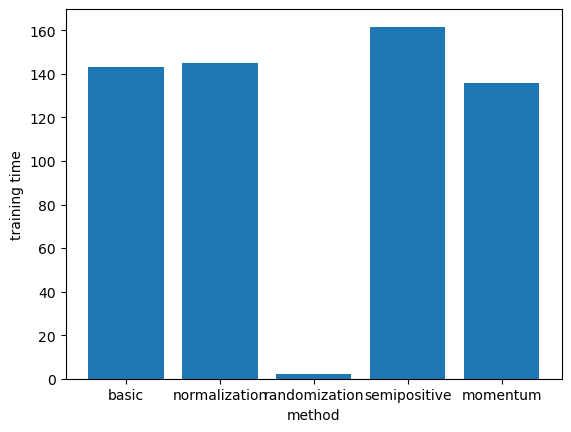

In [85]:
time_of_each_method = [time_basic_10,time_normalization_10,time_randomization_10,time_semipositive_10,time_momentum_10]
methods = ["basic","normalization","randomization","semipositive","momentum"]
plt.bar(methods,time_of_each_method)
plt.xlabel("method")
plt.ylabel("training time")
plt.show()

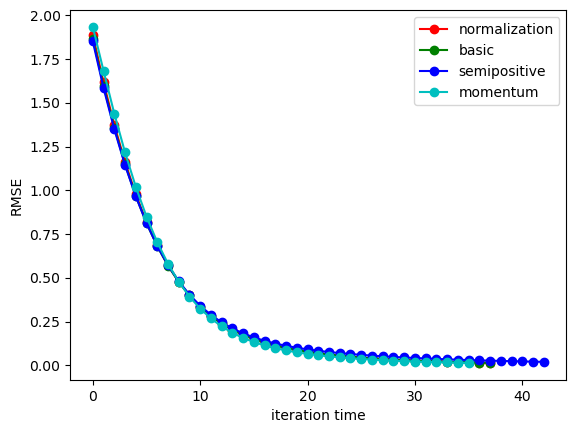

In [86]:
plt.plot(range(len(RMSE_normalization_10)),RMSE_normalization_10,'o-',color = 'r',label="normalization")
plt.plot(range(len(RMSE_basic_10)),RMSE_basic_10,'o-',color = 'g',label="basic")
plt.plot(range(len(RMSE_semipositive_10)),RMSE_semipositive_10,'o-',color = 'b',label="semipositive")
plt.plot(range(len(RMSE_momentum_10)),RMSE_momentum_10,'o-',color = 'c',label="momentum")
plt.xlabel("iteration time")
plt.ylabel("RMSE")
plt.legend(loc = "best")
plt.show()

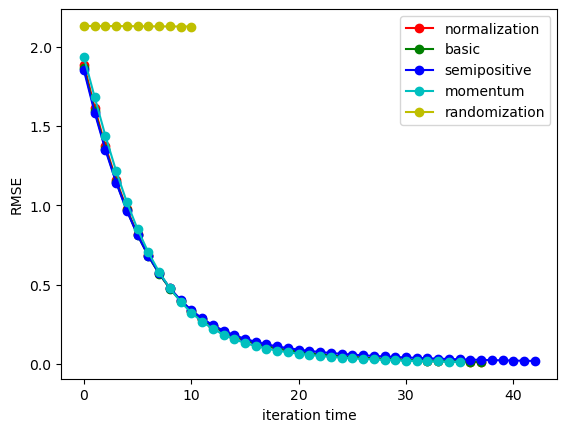

In [87]:
plt.plot(range(len(RMSE_normalization_10)),RMSE_normalization_10,'o-',color = 'r',label="normalization")
plt.plot(range(len(RMSE_basic_10)),RMSE_basic_10,'o-',color = 'g',label="basic")
plt.plot(range(len(RMSE_semipositive_10)),RMSE_semipositive_10,'o-',color = 'b',label="semipositive")
plt.plot(range(len(RMSE_momentum_10)),RMSE_momentum_10,'o-',color = 'c',label="momentum")
plt.plot(range(len(RMSE_randomization_10)),RMSE_randomization_10,'o-',color = 'y',label="randomization")
plt.xlabel("iteration time")
plt.ylabel("RMSE")
plt.legend(loc = "best")
plt.show()

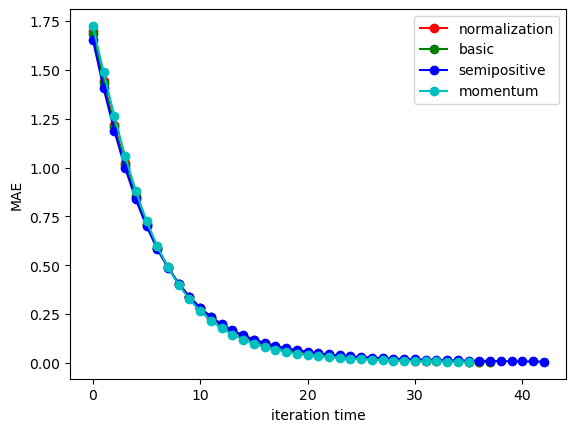

In [88]:
plt.plot(range(len(MAE_normalization_10)),MAE_normalization_10,'o-',color = 'r',label="normalization")
plt.plot(range(len(MAE_basic_10)),MAE_basic_10,'o-',color = 'g',label="basic")
plt.plot(range(len(MAE_semipositive_10)),MAE_semipositive_10,'o-',color = 'b',label="semipositive")
plt.plot(range(len(MAE_momentum_10)),MAE_momentum_10,'o-',color = 'c',label="momentum")
#plt.plot(range(len(MAE_randomization_10)),MAErandomization_10,'o-',color = 'y',label="randomization")
plt.xlabel("iteration time")
plt.ylabel("MAE")
plt.legend(loc = "best")
plt.show()

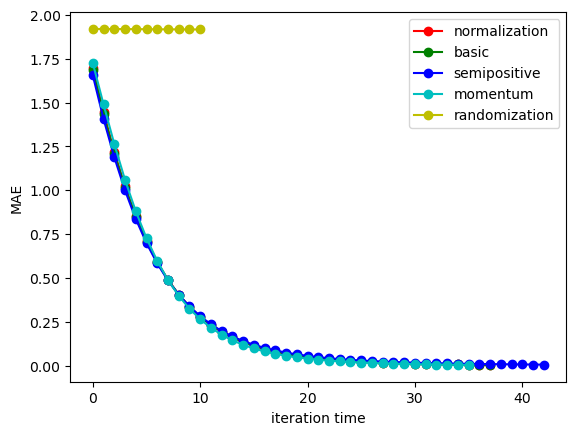

In [89]:
plt.plot(range(len(MAE_normalization_10)),MAE_normalization_10,'o-',color = 'r',label="normalization")
plt.plot(range(len(MAE_basic_10)),MAE_basic_10,'o-',color = 'g',label="basic")
plt.plot(range(len(MAE_semipositive_10)),MAE_semipositive_10,'o-',color = 'b',label="semipositive")
plt.plot(range(len(MAE_momentum_10)),MAE_momentum_10,'o-',color = 'c',label="momentum")
plt.plot(range(len(MAE_randomization_10)),MAE_randomization_10,'o-',color = 'y',label="randomization")
plt.xlabel("iteration time")
plt.ylabel("MAE")
plt.legend(loc = "best")
plt.show()

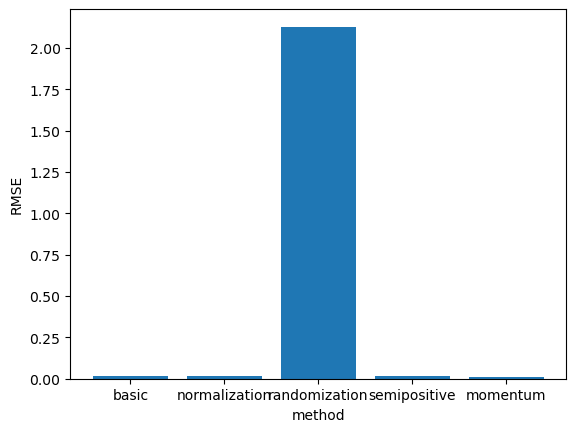

In [90]:
plt.bar(methods,[RMSE_basic_10[len(RMSE_basic_10)-1],RMSE_normalization_10[len(RMSE_normalization_10)-1],RMSE_randomization_10[len(RMSE_randomization_10)-1],RMSE_semipositive_10[len(RMSE_semipositive_10)-1],RMSE_momentum_10[len(RMSE_momentum_10)-1]])
plt.xlabel("method")
plt.ylabel("RMSE")
plt.show()

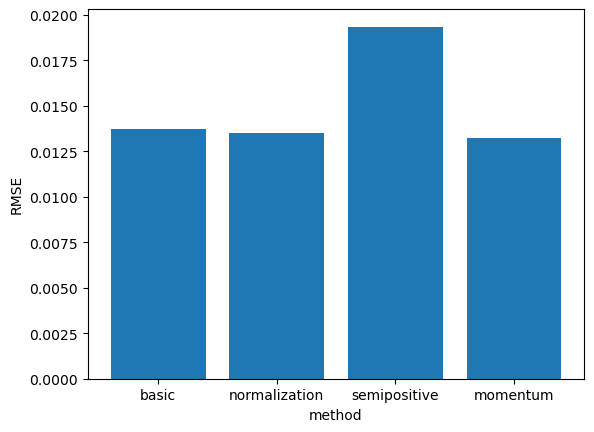

In [91]:
plt.bar(["basic","normalization","semipositive","momentum"],[RMSE_basic_10[len(RMSE_basic_10)-1],RMSE_normalization_10[len(RMSE_normalization_10)-1],RMSE_semipositive_10[len(RMSE_semipositive_10)-1],RMSE_momentum_10[len(RMSE_momentum_10)-1]])
plt.xlabel("method")
plt.ylabel("RMSE")
plt.show()

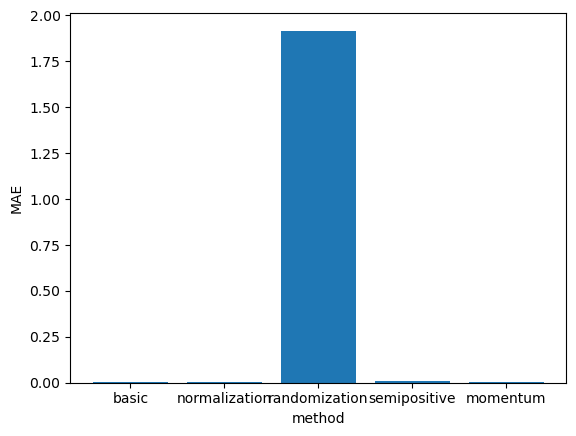

In [92]:
plt.bar(methods,[MAE_basic_10[len(MAE_basic_10)-1],MAE_normalization_10[len(MAE_normalization_10)-1],MAE_randomization_10[len(MAE_randomization_10)-1],MAE_semipositive_10[len(MAE_semipositive_10)-1],MAE_momentum_10[len(MAE_momentum_10)-1]])
plt.xlabel("method")
plt.ylabel("MAE")
plt.show()

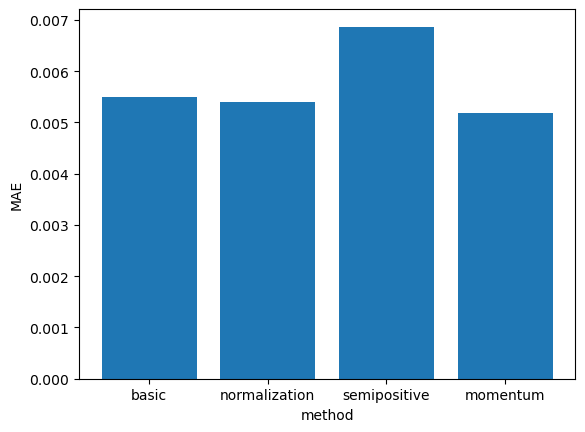

In [93]:
plt.bar(["basic","normalization","semipositive","momentum"],[MAE_basic_10[len(MAE_basic_10)-1],MAE_normalization_10[len(MAE_normalization_10)-1],MAE_semipositive_10[len(MAE_semipositive_10)-1],MAE_momentum_10[len(MAE_momentum_10)-1]])
plt.xlabel("method")
plt.ylabel("MAE")
plt.show()

In [94]:
the_user = random.randint(0,len(Users)-1)
print(Users[the_user])

A3BR5O7EXQGOSA


In [95]:
U_basic = P_basic_10@Q_basic_10
product_list_basic = []
for i in range (len(U_basic[the_user])):
    if(user_rating_table[the_user][i]<0):
        product_list_basic.append((U_basic[the_user][i],Products[i]))
recommendation_basic = sorted(product_list_basic)
print(recommendation_basic[-10:])

[(3.131036726235799, 'B000B9RI14'), (3.1523593863958883, 'B000EUGX70'), (3.1748239626768, 'B000BUK7KW'), (3.1841093693313525, 'B00009R6VS'), (3.1931242312800636, 'B00001P4ZR'), (3.2037378383015453, 'B00004SABB'), (3.2170074510566904, 'B00017LSPI'), (3.2775032530364787, 'B000A6PPOK'), (3.296378624088832, 'B000GPVN32'), (3.601164059865309, 'B000ID6DTG')]


In [96]:
U_normalization = P_normalization_10@Q_normalization_10
product_list_normalization = []
for i in range (len(U_normalization[the_user])):
    if(user_rating_table[the_user][i]<0):
        product_list_normalization.append((U_normalization[the_user][i],Products[i]))
recommendation_normalization = sorted(product_list_normalization)
print(recommendation_normalization[-10:])

[(3.62406041994071, 'B000AM8SK2'), (3.6326138560959733, 'B000EBK3FW'), (3.6458550744423497, 'B000068O34'), (3.6459198556489447, 'B00007M1TZ'), (3.6530622979355445, 'B0007KPRIS'), (3.657500359076782, 'B00004SYNX'), (3.6615375035452975, 'B000GPVN32'), (3.7834021579804413, 'B000F6LXUU'), (3.8102347953730935, 'B000FBK3QK'), (3.827088035414066, 'B00006BBAC')]


In [97]:
U_randomization = P_randomization_10@Q_randomization_10
product_list_randomization = []
for i in range (len(U_randomization[the_user])):
    if(user_rating_table[the_user][i]<0):
        product_list_randomization.append((U_randomization[the_user][i],Products[i]))
recommendation_randomization = sorted(product_list_randomization)
print(recommendation_randomization[-10:])

[(2.5665078721216905, 'B000B60H0G'), (2.583075744310982, 'B000GFHJUS'), (2.6064871484896845, 'B000AA2RCY'), (2.641747799996311, 'B0002BEPU8'), (2.641834379514158, 'B000EWHH7I'), (2.6502046425003867, 'B00005BABT'), (2.6692092137345846, 'B00020M1U0'), (2.7106685751949673, 'B000FIQBL4'), (2.711718704560931, 'B000CR78C4'), (2.787452342341629, 'B000EIZJF4')]


In [98]:
U_semipositive = P_semipositive_10@Q_semipositive_10
product_list_semipositive = []
for i in range (len(U_semipositive[the_user])):
    if(user_rating_table[the_user][i]<0):
        product_list_semipositive.append((U_semipositive[the_user][i],Products[i]))
recommendation_semipositive = sorted(product_list_semipositive)
print(recommendation_semipositive[-10:])

[(3.8534277552067944, 'B0001Y7UAI'), (3.873172773651792, 'B000HPV3RW'), (3.9007690231851138, 'B0002WTK4S'), (3.9205979575620353, 'B0000C3GWU'), (3.952037371020966, 'B0000632H2'), (3.963951244813322, 'B00006I53W'), (3.98975881114689, 'B000CKVOOY'), (4.085406652211237, 'B000068O16'), (4.103760570841141, 'B00009R8DS'), (4.119182408935584, 'B000EYRLXQ')]


In [99]:
U_momentum = P_momentum_10@Q_momentum_10
product_list_momentum = []
for i in range (len(U_momentum[the_user])):
    if(user_rating_table[the_user][i]<0):
        product_list_momentum.append((U_momentum[the_user][i],Products[i]))
recommendation_momentum = sorted(product_list_momentum)
print(recommendation_momentum[-10:])

[(3.055578662118161, 'B00009J5VX'), (3.0725689626842163, 'B000CQPWMS'), (3.086586749880527, 'B000H4WKWK'), (3.095235746760615, 'B0002L596M'), (3.1040452314812135, 'B000FJELQA'), (3.135885741385048, 'B00005T3G0'), (3.1405815287457175, 'B00006BBAC'), (3.173711713829349, 'B000B65Q3Y'), (3.2697672101661066, 'B0001M3MUW'), (3.2808567828247, 'B0000BZL0G')]
